# Deep Learning for Computer Vision:  HW 1


## Computer Science: COMS W 4995 001


### Due: September 23, 2025

### General Instructions
- Before submitting, move your final answers (summaries, results, key plots) under the “Final Answer – Problem X” headings at the top of the notebook.
- Ensure your notebook runs top-to-bottom without errors.

In this homework, Problem 1 final answer needs to be shown on the top of the notebook. Problem 2 and Problem 3 can be submitted as PDF.

### Final Answer - Problem 1

#### Problem 1  (50%)

Let's start with a two class classification problem. You are asked to

1. Create your own dataset using real data. This data can be found by you online or gathered and measured by you. You are not to use datasets that others have put together, instead you are looking for raw data for a two class classification problem. The data does not have to come from images, but it is ok if it does. The data should contain 100 or more samples (more is better) from each class and the features should be at least 2 dimensional. It is ok to use Python libs, e.g. OpenCV, to extract features from your raw data. And it is ok if the labels for the classes are given by the data, or you can annotate this data yourself. 

2. Divide this data up into a training set (80%) and a test set (20%). Experiment with plotting this data in some of the raw feature dimensions much like we did in class. Hand-draw possible classifiers in these plots. 

3. Compute the prior for both classes from the data you gathered. Or if you do not believe you can determine this, assume both classes are equally likely. If you only have a couple of features, you can try to fit to a multivariate Gaussian class conditional density functions--this simply means you need to find the sample mean and sample covariance matrix for both classes from the samples. Alternatively, you can use a naive Bayes algorithm that assumes each feature is independent. But again assume a Gaussian distribution for each and find the joint probability as the product of the per feature probabilities. Plot the decision boundary for a minimum error-rate classifier assuming your fits are correct. Are these good fits to your data? How does this decision boundary differ from the one you drew by hand?

4. ⁠What was the most challenging part of this problem? Why?

To make things more consistent, let's all use the same notation.  Let the class conditional density functions (or likelihoods) be given by $\rho({\bf x}|y_i)$ where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are the same for both classes. Hint: you can find the decision boundary by densely generating sample points ${\bf x}_j \in X$ according to your ccd's, classifying them, and then plotting and coloring them according to their predicted label.

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy to fit to your Gaussian distribution(s).

Along with your code and plots, include a written explanation of each step and submit as a PDF: 

1. How you created or collected your dataset (including tools/libraries used).
2. Why you selected the features you did.
3. How you computed priors, means, and covariances.
4. Comparison between your hand-drawn boundary and the Gaussian classifier decision boundary (include images).
5. A short reflection on whether the Gaussian boundary is a good fit for your data.

Note: You are free to write anything else which you find relevant in the PDF. 

In [159]:
import random
import pathlib
from pathlib import Path

## checking if there are more than 100 samples per class

coke = Path("./coke")
sprite = Path("./sprite")

coke_files = []
for file in coke.iterdir():
    if file.is_file():
        coke_files.append(file)
print('Num of coke images: ', len(coke_files))

sprite_files = []
for file in sprite.iterdir():
    if file.is_file():
        sprite_files.append(file)
print("Num of sprite images: ", len(sprite_files))

# then we shuffle for randomness

random.shuffle(coke_files)
random.shuffle(sprite_files)


Num of coke images:  105
Num of sprite images:  101


In [160]:
# 80 / 20 test split

n_coke_train = int(0.8 * len(coke_files)) 
n_sprite_train = int(0.8 * len(sprite_files))

# seperating arrays into testing and training arrays

coke_train = coke_files[:n_coke_train]
coke_test = coke_files[n_coke_train:]
print("Coke train len: ", len(coke_train), "\n"
      "Coke test len: ", len(coke_test))

sprite_train = sprite_files[:n_sprite_train]
sprite_test = sprite_files[n_sprite_train:]
print("Sprite train len: ", len(sprite_train), "\n"
      "Sprite test len: ", len(sprite_test))

Coke train len:  84 
Coke test len:  21
Sprite train len:  80 
Sprite test len:  21


In [161]:
import cv2

def extract_red_green_mean(file_path):
    img = cv2.imread(str(file_path)) 
    # print(img.shape)
    # returns np array for (height, width, channels)
    # however channels loads as BGR
    mean_colors = img.mean(axis=(0,1)) # takes the average across all pixels (0 for height & 1 for width), but keeps the channels separate
    # basically returns (mean_blue, mean_green, mean_red) BGR not RGB
    mean_red = mean_colors[2]
    mean_green = mean_colors[1]
    return mean_red, mean_green

## This function was created w the help of this :
## https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

In [162]:
# started to apply the feature extraction function to create seperate feature lists
# however got the error below 
#
# AttributeError: 'NoneType' object has no attribute 'mean'
#
# since i didnt do any data cleaning, I thought that the issue was either from the different pixel/sizes or from the different img formats 
#
# the error happened to be from .avif format (only 3 images) so i just manually converted them to png -- although I should have coded that ..

coke_features = []
for file in coke_train:
    try:
        coke_features.append(extract_red_green_mean(file))
    except Exception as e:
        print(f"Error with {file}: {e}")

In [163]:
# trying again to apply feature extraction aka how much of the picture is green v red
# then seperate into red and green, for both coke and sprite

coke_features = []
for file in coke_train:
    coke_features.append(extract_red_green_mean(file))

coke_red = []
coke_green = []
for feature in coke_features:
    coke_red.append(feature[0])
    coke_green.append(feature[1])

sprite_features = []
for file in sprite_train:
    sprite_features.append(extract_red_green_mean(file))

sprite_red = []
sprite_green = []
for feature in sprite_features:
    sprite_red.append(feature[0])
    sprite_green.append(feature[1])

print(len(coke_red), len(coke_green))
print(len(sprite_red), len(sprite_green))

84 84
80 80


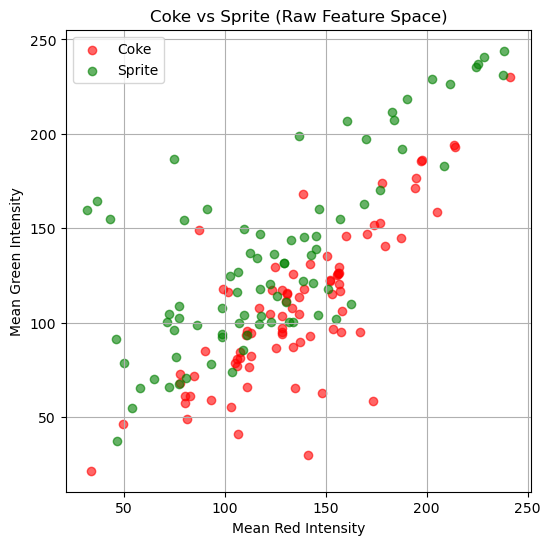

In [164]:
import matplotlib.pyplot as plt

# plotting features against eachother

plt.figure(figsize=(6,6))
plt.scatter(coke_red, coke_green, color="red", alpha=0.6, label="Coke")
plt.scatter(sprite_red, sprite_green, color="green", alpha=0.6, label="Sprite")
plt.xlabel("Mean Red Intensity")
plt.ylabel("Mean Green Intensity")
plt.title("Coke vs Sprite (Raw Feature Space)")
plt.legend()
plt.grid(True)
plt.show()

In [165]:
# in this scatterplot (red/green means), i'm basically plotting brightness along both axes.
# bright images → higher red & green values, dark images → lower red & green values.
# that’s why everything spreads along a diagonal “cloud” (roughly y = x)

# but the spread is very wide: dark Coke and dark Sprite can look similar, and bright Coke and bright Sprite can also look similar
# so although you see a diagonal trend, it’s brightness-driven, not class-driven i assume

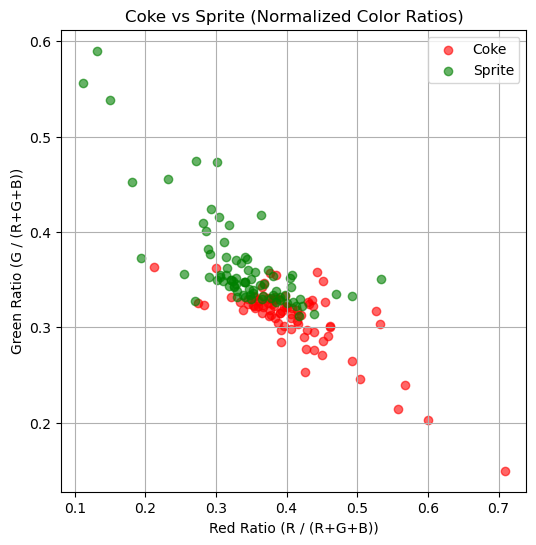

In [166]:
## that result is ok.. but perhaps a better method would be to use ratios of green / red
## my assumption is that basckground colors affected the outcome in the previous plot

import cv2
from pathlib import Path
import random
import matplotlib.pyplot as plt

def extract_color_ratios(file_path):
    img = cv2.imread(str(file_path))
    mean_colors = img.mean(axis=(0,1))  # BGR order
    mean_blue, mean_green, mean_red = mean_colors
    total = mean_red + mean_green + mean_blue
    if total == 0:
        return None
    red_ratio = mean_red / total
    green_ratio = mean_green / total
    return red_ratio, green_ratio

coke_red_ratio, coke_green_ratio = [], []
for file in coke_train:
    result = extract_color_ratios(file)
    if result:
        coke_red_ratio.append(result[0])
        coke_green_ratio.append(result[1])

sprite_red_ratio, sprite_green_ratio = [], []
for file in sprite_train:
    result = extract_color_ratios(file)
    if result:
        sprite_red_ratio.append(result[0])
        sprite_green_ratio.append(result[1])

plt.figure(figsize=(6,6))
plt.scatter(coke_red_ratio, coke_green_ratio, color="red", alpha=0.6, label="Coke")
plt.scatter(sprite_red_ratio, sprite_green_ratio, color="green", alpha=0.6, label="Sprite")
plt.xlabel("Red Ratio (R / (R+G+B))")
plt.ylabel("Green Ratio (G / (R+G+B))")
plt.title("Coke vs Sprite (Normalized Color Ratios)")
plt.legend()
plt.grid(True)
plt.show()


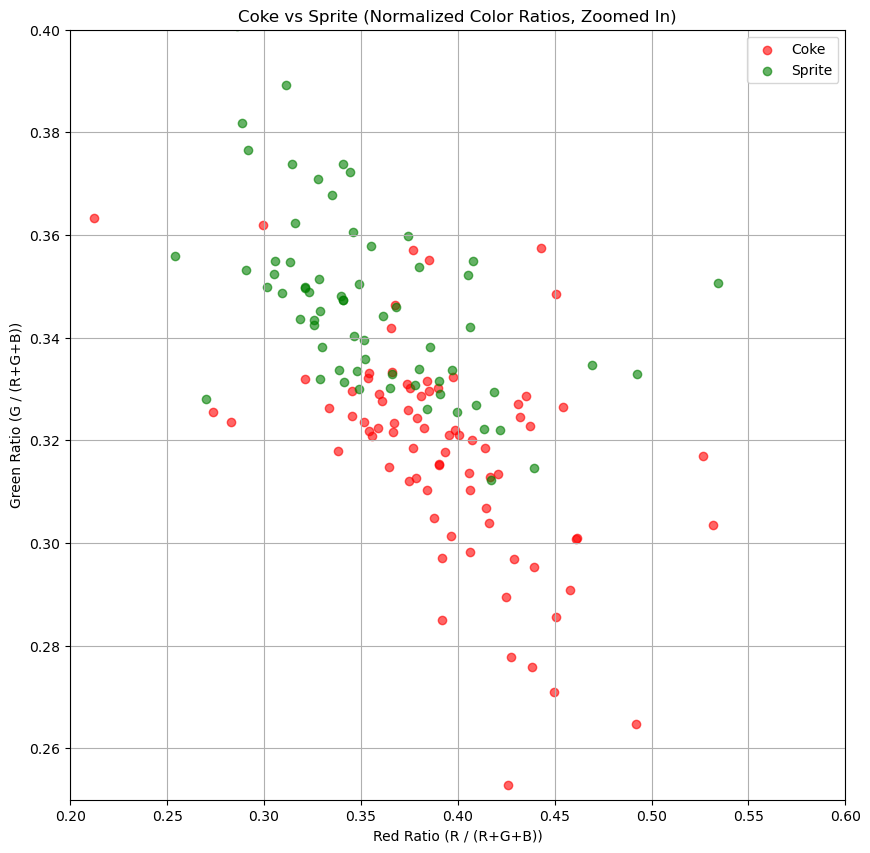

In [167]:
## zooming into the middle section to see if theres a better division

plt.figure(figsize=(10,10))
plt.scatter(coke_red_ratio, coke_green_ratio, color="red", alpha=0.6, label="Coke")
plt.scatter(sprite_red_ratio, sprite_green_ratio, color="green", alpha=0.6, label="Sprite")
plt.xlabel("Red Ratio (R / (R+G+B))")
plt.ylabel("Green Ratio (G / (R+G+B))")
plt.title("Coke vs Sprite (Normalized Color Ratios, Zoomed In)")
plt.legend()
plt.grid(True)
plt.xlim(0.2, 0.6)
plt.ylim(0.25, 0.4)
plt.show()


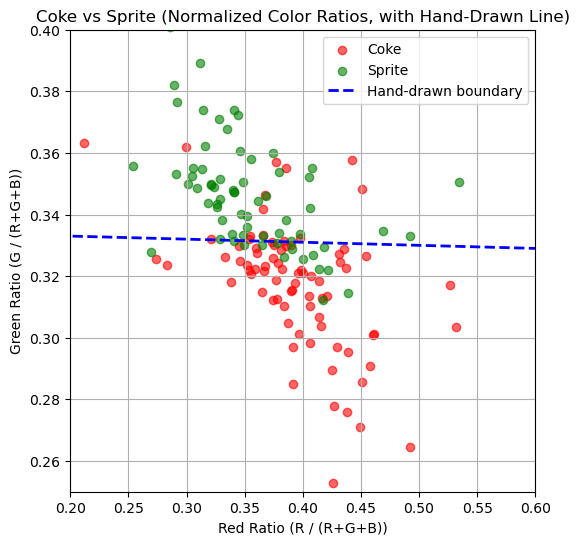

In [168]:
# these ratios remove brightness, so even if one image is darker/brighter, the ratios are consistent
# that’s why there's clusters in the middle, where the big diff is coke having higher red ratios and sprite higher green ratios
# below is a "hand drawn" line to estimate where the classifiers will probs be

import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(coke_red_ratio, coke_green_ratio, color="red", alpha=0.6, label="Coke")
plt.scatter(sprite_red_ratio, sprite_green_ratio, color="green", alpha=0.6, label="Sprite")

# Line: G_ratio = -0.5 * R_ratio + 0.5
x_vals = np.linspace(0, 1, 100)  # range of red ratio
y_vals = -0.01 * x_vals + 0.335
plt.plot(x_vals, y_vals, color="blue", linestyle="--", linewidth=2, label="Hand-drawn boundary")

# Labels & formatting
plt.xlabel("Red Ratio (R / (R+G+B))")
plt.ylabel("Green Ratio (G / (R+G+B))")
plt.title("Coke vs Sprite (Normalized Color Ratios, with Hand-Drawn Line)")
plt.legend()
plt.grid(True)
plt.xlim(0.2, 0.6)
plt.ylim(0.25, 0.4)
plt.show()

In [169]:
## now we move on to the math portion: priors, sample mean, covariance, PDF

## compute priors -- num of [coke/sprite] images / all images
total_training_images = (len(coke_train) + len(sprite_train))
P_coke = len(coke_train) / total_training_images
P_sprite = len(sprite_train) / total_training_images
print("Prior of coke: ", P_coke)
print("Prior of sprite: ", P_sprite)


Prior of coke:  0.5121951219512195
Prior of sprite:  0.4878048780487805


In [170]:
print(len(coke_red_ratio)) # the ratio of the image being red for all coke training images
print(len(coke_green_ratio))
print(len(sprite_red_ratio)) # the ratio of the image being red for all sprite training images
print(len(sprite_green_ratio))


84
84
80
80


In [171]:
print(coke_red_ratio)
print(coke_green_ratio)

[0.42577887605854636, 0.3987141539287586, 0.3809954637710202, 0.3964450135060829, 0.3976084047748626, 0.39564840610991897, 0.4579790786497989, 0.44952634911049805, 0.27382719008293394, 0.4166704336903362, 0.3593548092489986, 0.36462802190484295, 0.42050978664911226, 0.5038774788659935, 0.4290749081232022, 0.4159365912623929, 0.3823907591349088, 0.38388622633868114, 0.37405202336082416, 0.4139910996064604, 0.38416118801733945, 0.40656176213417866, 0.5572267136132617, 0.3789688489387704, 0.34565495225108944, 0.40628543999143396, 0.6006702785650541, 0.4318588088298589, 0.3540965482945511, 0.3737809417679178, 0.2831964629532654, 0.3535353516962881, 0.4143426784533688, 0.3902365636713862, 0.40044660838292717, 0.3917552226812279, 0.38514947182173853, 0.33329735971040203, 0.358763329175746, 0.3851490377502081, 0.3213323051187837, 0.3556336216426811, 0.3454092807534504, 0.3666992594293846, 0.43748727228433426, 0.3677384663992614, 0.4918238150839537, 0.5318655089597077, 0.4272452689032092, 0.43

In [172]:
## compute sample mean -- (red, green) average for each class
mu_coke_red = sum(coke_red_ratio) / len(coke_red_ratio)
mu_coke_green = sum(coke_green_ratio) / len(coke_green_ratio)
mu_coke = [mu_coke_red, mu_coke_green]

mu_sprite_red = sum(sprite_red_ratio) / len(sprite_red_ratio)
mu_sprite_green = sum(sprite_green_ratio) / len(sprite_green_ratio)
mu_sprite = [mu_sprite_red, mu_sprite_green]

print(mu_coke) # average red ratio across all training images , average green ratio across all training images
print(mu_sprite)

[0.40449707886821945, 0.311404820562643]
[0.3368058229697953, 0.3645904811803381]


In [173]:
## i am concerned with the closeness of the averages for both coke and sprite, 
# perhaps there is a better method i will explore later, but for now lets leave it
# since my assumption is true -- on average, coke is more red, and on average, sprite is more green

In [174]:
# differences from mean
diffs_coke = []
for r, g in zip(coke_red_ratio, coke_green_ratio):
    diffs_coke.append([r - mu_coke_red, g - mu_coke_green])

# covariance matrix (2x2)
coke_var_rr = sum(d[0]**2 for d in diffs_coke) / (len(diffs_coke)-1)
coke_var_gg = sum(d[1]**2 for d in diffs_coke) / (len(diffs_coke)-1)
coke_cov_rg = sum(d[0]*d[1] for d in diffs_coke) / (len(diffs_coke)-1)

Sigma_coke = [[coke_var_rr, coke_cov_rg],
              [coke_cov_rg, coke_var_gg]]

print(coke_var_rr)
print(coke_var_gg)
print(coke_cov_rg)
print(Sigma_coke)

0.00481327125872136
0.0011323303915866721
-0.0018258043626370346
[[0.00481327125872136, -0.0018258043626370346], [-0.0018258043626370346, 0.0011323303915866721]]


In [ ]:
## Here we see that the variance for both red and green in Coke images are super small -- pretty good
# also the variance of green is smaller than the variance of red, so green ratios in Coke images are more consistent

## cov is a negative value
# if red is higher than its mean in a Coke image, green tends to be slightly lower than its mean

In [175]:
## doing the same for sprite
diffs_sprite = []
for r, g in zip(sprite_red_ratio, sprite_green_ratio):
    diffs_sprite.append([r - mu_sprite_red, g - mu_sprite_green])

sprite_var_rr = sum(d[0]**2 for d in diffs_sprite) / (len(diffs_sprite)-1)
sprite_var_gg = sum(d[1]**2 for d in diffs_sprite) / (len(diffs_sprite)-1)
sprite_cov_rg = sum(d[0]*d[1] for d in diffs_sprite) / (len(diffs_sprite)-1)

Sigma_sprite = [[sprite_var_rr, sprite_cov_rg],
              [sprite_cov_rg, sprite_var_gg]]

print(sprite_var_rr)
print(sprite_var_gg)
print(sprite_cov_rg)
print(Sigma_sprite)

0.004955340991440247
0.002706741783771418
-0.002737687658480634
[[0.004955340991440247, -0.002737687658480634], [-0.002737687658480634, 0.002706741783771418]]


In [ ]:
## the variance for both red / green in Srpite images are also small

# sprite images also have some variability in red, but green varies more compared to Coke.
# negative covariance suggests same thing, that if a Sprite image is more red, it’s slightly less green
# since sprite is generally green (higher mu_sprite_green than mu_sprite_red), this makes sense that deviations in red and green are inversely related


In [177]:
## compute multivariate gaussian

def multivariate_gaussian(x, mu, Sigma):
    x = np.array(x)
    mu = np.array(mu)
    Sigma = np.array(Sigma)
    det = np.linalg.det(Sigma)
    inv = np.linalg.inv(Sigma)
    diff = x - mu
    return (1 / (2 * np.pi * np.sqrt(det))) * np.exp(-0.5 * diff.T @ inv @ diff)

r_vals = np.linspace(0, 1, 200)  # red ratio range
g_vals = np.linspace(0, 1, 200)  # green ratio range
R, G = np.meshgrid(r_vals, g_vals)
grid_points = np.c_[R.ravel(), G.ravel()]


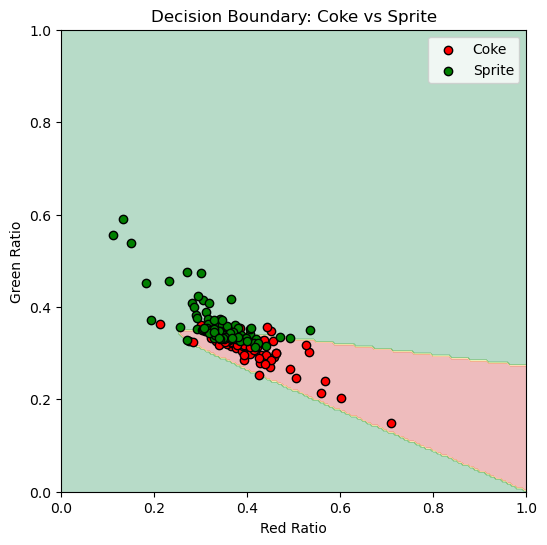

In [181]:
# predict class for each grid point
predictions = []
for x_j in grid_points:
    rho_c = multivariate_gaussian(x_j, mu_coke, Sigma_coke)
    rho_s = multivariate_gaussian(x_j, mu_sprite, Sigma_sprite)
    predicted = 0 if rho_c > rho_s else 1  # 0=Coke, 1=Sprite
    predictions.append(predicted)

predictions = np.array(predictions).reshape(R.shape)

# Plot decision boundary
plt.figure(figsize=(6,6))
plt.contourf(R, G, predictions, alpha=0.3, cmap='RdYlGn')
plt.scatter(coke_red_ratio, coke_green_ratio, c='red', label='Coke', edgecolor='k')
plt.scatter(sprite_red_ratio, sprite_green_ratio, c='green', label='Sprite', edgecolor='k')
plt.xlabel("Red Ratio")
plt.ylabel("Green Ratio")
plt.title("Decision Boundary: Coke vs Sprite")
plt.legend()
plt.show()

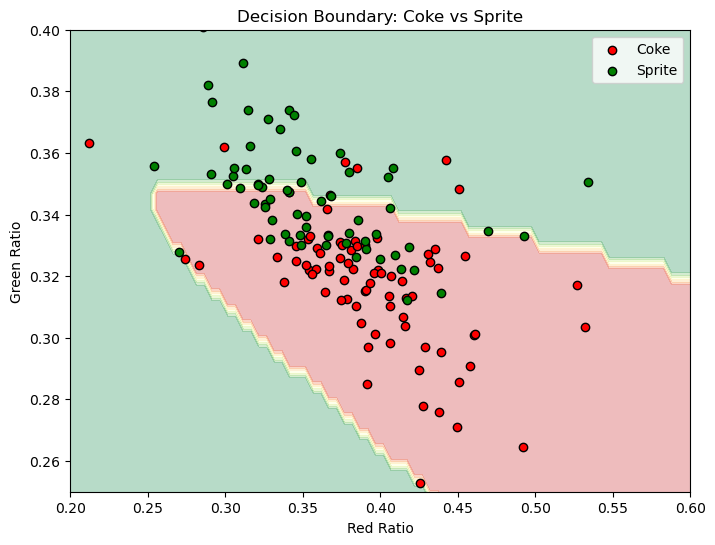

In [182]:
## zooming into the middle cluster

plt.figure(figsize=(8,6))
plt.contourf(R, G, predictions, alpha=0.3, cmap='RdYlGn')
plt.scatter(coke_red_ratio, coke_green_ratio, c='red', label='Coke', edgecolor='k')
plt.scatter(sprite_red_ratio, sprite_green_ratio, c='green', label='Sprite', edgecolor='k')
plt.xlabel("Red Ratio")
plt.ylabel("Green Ratio")
plt.title("Decision Boundary: Coke vs Sprite")
plt.legend()
plt.xlim(0.2, 0.6)
plt.ylim(0.25, 0.4)
plt.show()

#### Problem 2  (25%)

Research an application for computer vision, describe the underlying problem and the methods used to solve it. If the application was presented in popular media (e.g., NY Times), track down the scientific methods used in the academic literature. Include references. It is ok if this is related to what you are thinking about for your final project! This write-up should be a two to three pages including images and diagrams as needed. 

#### Problem 3  (25%)

Revisit Problem 2 above. Imagine that you had to build this application yourself. Using internet searches, seek out existing pre-trained deep learning models and describe how you might use these to build a ML pipeline for your use-case. Consider GitHub, Huggingface, and tech blogs and model zoos from some of the big AI companies. Include references.

### What to submit? 
1. This python notebook : YOUR_UNI.ipynb
2. Problem 1 PDF write up: Q1_UNI.pdf
3. Problem 2 PDF : Q2_UNI.pdf
4. Problem 3 PDF : Q3_UNI.pdf